# 노이즈 필터링
 - 데이터를 구성하는 주성분의 가장 큰 부분집합만 사용해 데이터를 재구성하면 신호는 유지하고 노이즈는 걸러낼 수 있음
 - 데이터셋의 특징 수를 줄이면서도 데이터들 사이의 핵심적인 관계는 유지하는 기법
 - 데이터 내에 비선형적인 관계가 있을 때는 잘 동작하지 않음

## 노이즈가 없는 입력 데이터 플로팅

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

## 노이즈가 없는 입력 데이터 플로팅

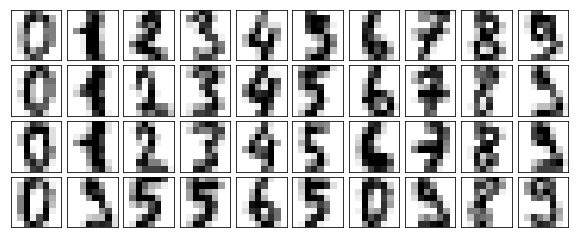

In [8]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10,4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                 cmap='binary', interpolation='nearest',
                 clim=(0, 16))
plot_digits(digits.data)

## 노이즈가 섞인 데이터 플로팅

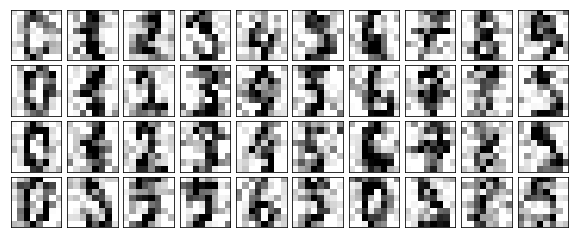

In [18]:
import numpy as np

np.random.seed(42)
# 정규 분포
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

## PCA가 분산의 50%를 보존하는 조건으로 노이즈 섞인 데이터 학습

In [10]:
# PCA : 주성분 분석
from sklearn.decomposition import PCA

pca = PCA(0.50).fit(noisy)
pca.n_components_

12

## 노이즈가 제거된 숫자 플로팅

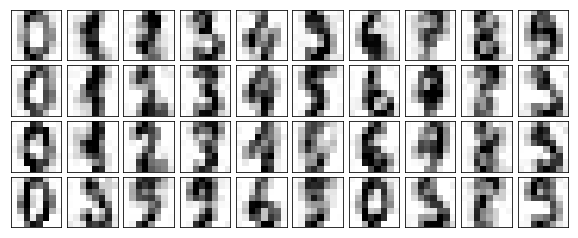

In [11]:
components = pca.transform(noisy)
# 변환된 근사행렬을 원래의 차원으로 복귀
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# 고유얼굴

## 고유얼굴(eigenfaces) 데이터 적재

In [12]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


## 데이터셋을 생성하는 주축 파악

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, svd_solver='randomized')
pca.fit(faces.data) 

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

## 몇 개의 주성분을 이용한 이미지 시각화

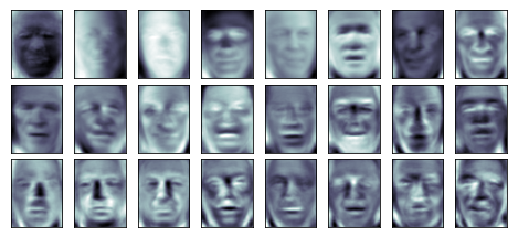

In [33]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

## 주성분들의 누적 분산을 통해 이 사영이 얼마나 많은 데이터 정보를 보존하는지 확인

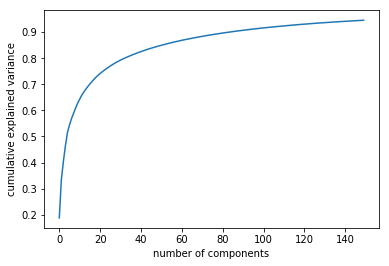

In [34]:
# cumsum : 누적합
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## 입력 이미지와 150개의 성분으로 재구성한 이미지 비교

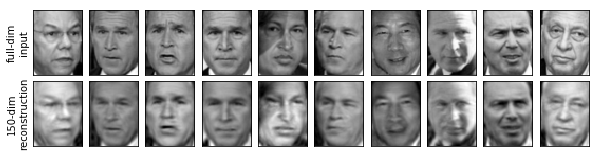

In [24]:
# 성분과 사영된 얼굴 계산
pca = PCA(n_components=150, svd_solver='randomized').fit(faces.data)
# 150개의 성분으로 재구성
components = pca.transform(faces.data)
# 원래의 차원으로 복귀
projected = pca.inverse_transform(components)

# 결과 플로팅
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');